<a href="https://colab.research.google.com/github/joaochenriques/FFT_Testing/blob/main/FFT_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as mpl

In [21]:
# If running python on Windows operating system, copy the file:
# https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py
# to the working folder before running the notebook

import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py 

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (6,4.5)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3483  100  3483    0     0   8773      0 --:--:-- --:--:-- --:--:--  8751


In [39]:
f = 1.0
ω = 2.0 * np.pi * f 
t = np.linspace( 0, 100, 1024 )
y = np.sin( ω * t  )

In [40]:
nFFT = 1000

fsample = 1.0 / ( t[1] - t[0] )
delta_f = fsample / nFFT

Freqs = delta_f * np.array( range( nFFT ) )

fd_time = np.arange( nFFT ) / fsample
fd_data = np.copy( y[-nFFT:] ) 

Amps = np.fft.fft( fd_data )

In [41]:
Spec_Af  = 2.0 * np.abs( Amps ) / nFFT            # amplitude 
Spec_Var = 0.5 * Spec_Af**2                       # Variance spectrum
Spec_Sf  = Spec_Var / delta_f                     # Spectral density

Spec_A_mean = np.sqrt( sum( Spec_Sf ) * delta_f ) # mean Amplitude

In [42]:
Spec_A_mean

0.9995075569612428

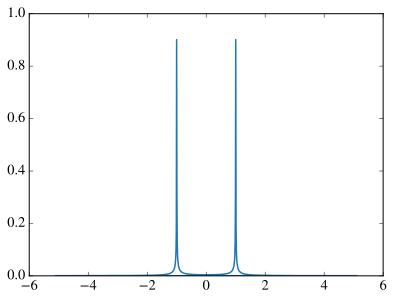

In [46]:
freq = np.fft.fftfreq( n = nFFT, d = 1.0 / fsample )
mpl.plot( freq, Spec_Af )